# Digit Recognizer - MNIST
##### https://www.kaggle.com/competitions/digit-recognizer

### Imports


In [187]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Load Data

In [188]:
# In each row, first column contains a label (digit). The remainder 784 columns (28px x 28px image) contain pixel values of 0-255.
mnist_data = pd.read_csv("data/train.csv")
mnist_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Transform Data

In [189]:
# Shuffle data by rows
mnist_data = mnist_data.sample(frac=1, axis=0)
mnist_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
31598,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10529,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26562,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
354,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4260,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4455,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8224,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
# Transpose the data so that the first row will be equal to all the labels and the remainder of rows in each column will be the corresponding pixel value
transposed_mnist_data = mnist_data.T
transposed_mnist_data.head()

,31598,3777,10529,26562,354,16285,28559,29589,18555,41180,...,27229,5212,2980,16085,38265,32976,4260,4455,8224,39927
label,6,0,1,9,2,5,2,7,1,7,...,2,4,4,2,0,0,1,7,9,4
pixel0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pixel1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pixel2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pixel3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [191]:
# Create NumPy array from Pandas dataframe
mnist_data_arr = transposed_mnist_data.values

In [192]:
mnist_data_arr

array([[6, 0, 1, ..., 7, 9, 4],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Divide data into test and train sets

In [193]:
# Y will contain 41000 labels that will be used for training the network.
# Label = a number from 0 to 9.
Y = mnist_data_arr[0, 1000:]
Y

array([5, 4, 9, ..., 7, 9, 4])

In [194]:
# Y_test contains 1000 labels that will be used to evaluate the network after each training epoch
Y_test = mnist_data_arr[0, :1000]
Y_test

array([6, 0, 1, 9, 2, 5, 2, 7, 1, 7, 6, 9, 1, 4, 2, 9, 5, 1, 4, 8, 0, 0,
       5, 5, 0, 8, 2, 5, 4, 7, 7, 1, 2, 5, 8, 6, 9, 3, 1, 9, 6, 1, 1, 3,
       6, 7, 9, 7, 4, 0, 4, 3, 9, 9, 9, 0, 7, 9, 0, 1, 7, 6, 6, 5, 3, 4,
       8, 7, 1, 4, 3, 9, 9, 2, 2, 9, 5, 9, 7, 2, 4, 5, 8, 7, 7, 2, 6, 1,
       2, 7, 9, 3, 2, 7, 0, 9, 2, 8, 1, 9, 2, 1, 4, 9, 5, 1, 7, 0, 8, 9,
       8, 6, 4, 6, 7, 2, 7, 6, 8, 2, 0, 6, 5, 1, 4, 7, 9, 8, 7, 3, 4, 2,
       0, 1, 3, 4, 0, 2, 0, 9, 2, 2, 9, 5, 1, 3, 8, 1, 1, 4, 0, 9, 1, 0,
       9, 9, 1, 5, 3, 8, 5, 6, 4, 5, 4, 7, 1, 0, 3, 6, 9, 4, 9, 3, 6, 5,
       1, 9, 8, 7, 2, 9, 8, 3, 6, 9, 1, 9, 0, 9, 2, 4, 6, 4, 6, 2, 4, 3,
       8, 4, 9, 0, 2, 5, 2, 7, 9, 8, 8, 0, 4, 0, 1, 7, 8, 0, 3, 3, 7, 5,
       9, 3, 9, 7, 3, 8, 9, 4, 5, 9, 3, 4, 4, 5, 2, 9, 5, 6, 5, 8, 9, 7,
       0, 5, 8, 1, 3, 3, 8, 4, 0, 9, 3, 3, 8, 5, 0, 6, 5, 8, 2, 2, 3, 3,
       2, 2, 5, 8, 2, 4, 1, 9, 8, 3, 6, 9, 8, 0, 3, 0, 6, 3, 6, 0, 6, 1,
       2, 1, 9, 3, 1, 4, 5, 4, 2, 2, 3, 2, 2, 5, 4,

In [195]:
# X will contain 41000 columns, each representing one training examples, each column/example contains 784 pixel values.
# Because the pixelvalues are between 0 and 255, and we want them to be between 0 and 1, we will divide by 255.0
# Each column corresponds to one label from Y
X = (mnist_data_arr[1:, 1000:] / 255.0)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [196]:
# X_test contains examples just like X but in X_test's case there is only 1000 examples that correspond to the labels from Y_test
X_test = (mnist_data_arr[1:, :1000] / 255.0)
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [197]:
# Transform a label so that 3 is represented by a column vector of [0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0] instead of just 3
# This is needed because the output layer of our network contains 10 neurons, each representing a number from 0 to 9
def one_hot(y):
    desired_output = np.zeros((10, 1))
    desired_output[y] = 1.0
    return desired_output

In [198]:
# Transform all our labels from Y using one_hot function defined above
# Each column is one example
one_hot_Y = np.array([one_hot(y) for y in Y]).T.reshape((10, 41000))
one_hot_Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

### Setup of weights and biases
##### This will depend on the # of layers and the # of neurons in each of them.
##### We will have 1 hidden layer with 30 neurons and 1 output layer with 10 neurons
##### Our input layer will be the MNIST date which is 784 rows (==neurons)

In [199]:
W1 = np.random.rand(30, 784) - 0.5 # Weights matrix between input layer and first layer
W2 = np.random.rand(10, 30)  - 0.5 # Weights matrix between first layer and output layer
b1 = np.random.rand(30, 1)   - 0.5 # Biases vector in first layer
b2 = np.random.rand(10, 1)   - 0.5 # biases vector in output layer

### Helper functions
##### Below functions are need to calculate the cost, activations, and errors

In [200]:
def sigmoid(Z):
    # Sigmoid function, applied elementwise if z is a matrix
    return 1.0 / (1.0 + np.exp(-Z))

def sigmoid_derivative(Z):
    # sigmoid(z) * (1 - sigmoid(z))
    # sigmoig(z) = activation so we can do it like below
    return sigmoid(Z) * (1.0 - sigmoid(Z))


In [201]:
def cost(A, Y):
    return np.power((A - Y) / 2, 2)

def cost_derivative(A, Y):
    return A - Y

##### Below function will output % of predictions that match the expected output

In [202]:
def calculate_accuracy(predictions, expected):
    max_indices = np.argmax(predictions, axis=0) # Transform each prediction (10 neurons from output layer) into one number between 0 and 9
    print(np.sum(max_indices == expected) / len(expected) * 100, "%") # Calculate % of predictions that are correct

## Stochastic Gradient Descent
#### Instead of going through all examples each time we take a random sampling of sample_size
#### We will train our model n number of times, where n = epochs

In [203]:
# Setup hyperparameters
epochs = 1000
sample_size = 100
learning_rate = 0.5

for epoch in range(epochs):
    # Create a random number between 1000 + sample_size and 41000, this is because the first 1000 examples from MNIST data are used for checking network's accuracy
    random_int = np.random.randint(1000 + sample_size, 41001)

    # Take a random sample of 100 examples from X
    X_sample = X[:, random_int - sample_size : random_int]
    # Take corresponding labels in one_hot form
    one_hot_Y_sample = one_hot_Y[:, random_int - sample_size : random_int]

    # Feedforward
    #   Calculate activations in the first and second layer.
    Z1 = np.dot(W1, X_sample) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2) # this will be our output

    # Backpropagation
    #   Calculate error in the output layer and backpropagate it to the first layer
    error_A2 = cost_derivative(A2, one_hot_Y_sample) * sigmoid_derivative(Z2) # Fundamental equation of backpropagation #1
    error_A1 = np.dot(W2.T, error_A2) # Fundamental equation of backpropagation #2

    #   Gradient descent
    #       Calculate how much does the cost function depend on each weight and bias
    delta_W2 = np.dot(error_A2, A1.T)        / sample_size # Fundamental equation of backpropagation #4
    delta_W1 = np.dot(error_A1, X_sample.T)  / sample_size # Fundamental equation of backpropagation #4
    delta_b2 = np.sum(error_A2)              / sample_size # Fundamental equation of backpropagation #3
    delta_b1 = np.sum(error_A1)              / sample_size # Fundamental equation of backpropagation #3
    #       Use above calculations to adjust weights and biases accordingly
    W1 = W1 - delta_W1 * learning_rate
    W2 = W2 - delta_W2 * learning_rate
    b1 = b1 - delta_b1 * learning_rate
    b2 = b2 - delta_b2 * learning_rate

    # Feedforward => checking accuracy using X_test data
    # A2 will be the output for X_test
    Z1 = np.dot(W1, X_test) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    # Every 100 iterations we will print the current accuracy of the network
    if epoch % 100 == 0:
        calculate_accuracy(A2, Y_test)

11.4 %
68.30000000000001 %
74.1 %
78.0 %
80.5 %
82.1 %
83.6 %
83.89999999999999 %
84.5 %
84.3 %


## Verifying
### After all of the above cells are run our network will have weights and biases set
### We can then use the below function to test those weights and biases to see how well the network performs

In [204]:
def test_weights_and_biases(idx):
    current_image = X[:, idx, None]

    Z1 = np.dot(W1, current_image) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    label = Y[idx]

    print("Prediction: ", np.argmax(A2))
    print("Label:      ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  4
Label:       4


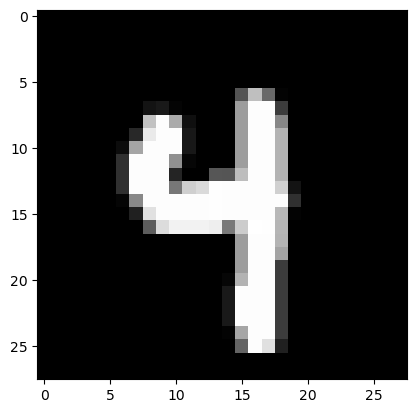

In [205]:
# We feed an index between 0 and 41000
# The function outputs the following:
# Prediction = what the network thinks the number is
# Label      = the actual number
# A 28x28 pixel photo of the number
test_weights_and_biases(40121)